In [1]:
#please run it in the root directory to avoid errors
import pandas as pd 
import numpy as np 
import seaborn as sns 
import os 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from data import fetch_data,feature_engineering
from sklearn.ensemble import RandomForestClassifier 

fea_variance=VarianceThreshold()
%matplotlib inline

In [2]:
path = '/home/anurag/Desktop/DS_Training/'


In [3]:
x_train,y_train,x_test,y_test = fetch_data(path,remove_duplicates=False,binary=False)

Datasets loaded :)
The dimensions of the training dataset is (494021, 41)
The dimensions of test dataset is (311028, 41)
The taken to do load data is 3.8229730129241943


In [4]:
x_train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0
6,0,tcp,http,SF,212,1940,0,0,0,0,...,1,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0
7,0,tcp,http,SF,159,4087,0,0,0,0,...,11,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0
8,0,tcp,http,SF,210,151,0,0,0,0,...,8,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0
9,0,tcp,http,SF,212,786,0,0,0,1,...,8,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0


In [5]:
(y_train.value_counts())


smurf.              280790
neptune.            107201
normal.              97260
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
others.                 18
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [6]:
print (x_train.shape)

print('the number of duplicate instances in x_train is {:.4f} %'.format( sum(x_train.duplicated())/(x_train.shape[0])*100 ))



(494021, 41)
the number of duplicate instances in x_train is 70.5310 %


In [7]:
print('the number of duplicate instances in x_test is {:.4f} %'.format( sum(x_test.duplicated())/(x_test.shape[0])*100  ))


the number of duplicate instances in x_test is 75.1739 %



# Label distribution of the duplicates

In [12]:
print('The number of duplicates instances in x_train is {}'.format(x_train.duplicated().sum()))
temp_duplicates = pd.concat([x_train,y_train],axis=1)
print ('The shape of temp_duplicates is {}'.format(temp_duplicates.shape))
print ('The number of duplicates in the training data considering labels too now is {} '.format(temp_duplicates.duplicated().sum()))

print('Turns out the labels of the duplicates are the same(almost !), so no worries in removing them.')

The number of duplicates instances in x_train is 348438
The shape of temp_duplicates is (494021, 42)
The number of duplicates in the training data considering labels too now is 348435 
Turns out the labels of the duplicates are the same(almost !), so no worries in removing them.


# Handling of Categorical features 

In [13]:
cat_features = ['protocol_type','service','flag','land','logged_in','is_host_login','is_guest_login']

In [14]:
x_train_cat = x_train.loc[:,cat_features]

In [15]:
x_train_cat['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

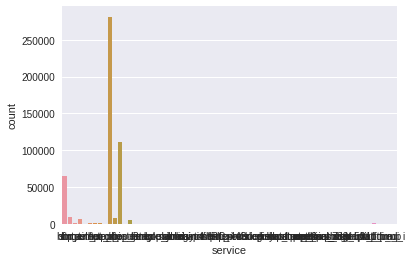

In [23]:
sns.countplot(x_train_cat['service'])

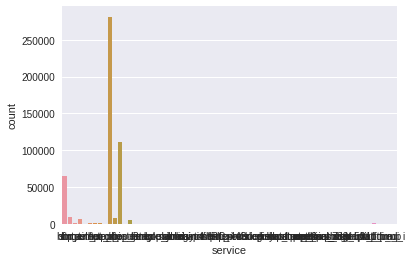

In [22]:
sns.countplot(x_train_cat['service'])

In [ ]:
def create_dummies_service(inp):
    if inp=='ecr_i':
        return 0
    elif inp=='private':
        return 1
    elif inp=='http':
        return 2
    elif inp=='smtp':
        return 3
    elif inp=='pop_3':
        return 4
    elif inp=='domain_u':
        return 5
    else:
        return 6

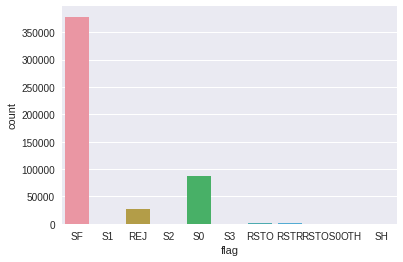

In [19]:
sns.countplot(x_train_cat['flag'])

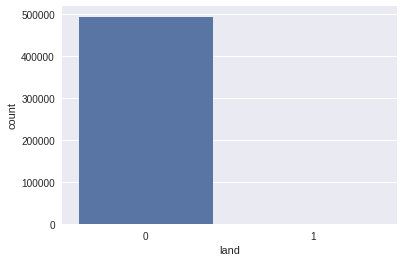

In [20]:
sns.countplot(x_train_cat['land'])

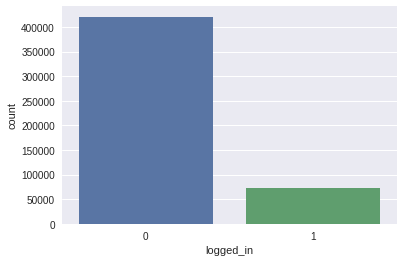

In [21]:
sns.countplot(x_train_cat['logged_in'])

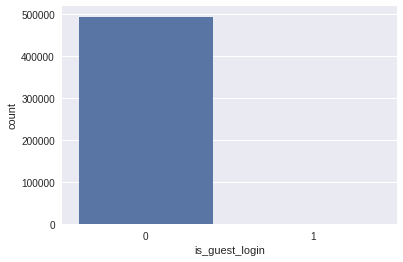

In [24]:
sns.countplot(x_train_cat['is_guest_login'])

In [ ]:
# sns.countplot(x_train['protocol_type'])
for col in x_train_cat.axes[1].values:
    sns.countplot(x_train_cat[col])
    plt.figure()

In [25]:
x_train_cat['land'].value_counts()

0    493999
1        22
Name: land, dtype: int64

In [ ]:
x_train_cat['is_host_login'].value_counts()
#This feature does not add anything
x_train.drop(['is_host_login'],axis=1,inplace=True)

In [ ]:
x_train_cat['is_guest_login'].value_counts()

# Handling of continous features 

In [26]:
cols=list(x_train.axes[1].values)
x_train_cont=x_train.loc[:,list(set(cols).difference(set(cat_features)))]

In [27]:
x_train_cont.shape

(494021, 34)

In [28]:
x_train_cont.axes[1].values

array(['srv_serror_rate', 'dst_host_diff_srv_rate', 'num_root',
       'dst_host_srv_rerror_rate', 'num_shells', 'num_outbound_cmds',
       'dst_host_srv_serror_rate', 'srv_diff_host_rate',
       'dst_host_srv_diff_host_rate', 'same_srv_rate',
       'dst_host_same_srv_rate', 'srv_rerror_rate', 'count',
       'dst_host_srv_count', 'hot', 'srv_count', 'serror_rate',
       'src_bytes', 'dst_host_rerror_rate', 'num_access_files', 'urgent',
       'rerror_rate', 'dst_host_serror_rate', 'su_attempted', 'dst_bytes',
       'dst_host_same_src_port_rate', 'wrong_fragment', 'diff_srv_rate',
       'num_failed_logins', 'root_shell', 'duration', 'dst_host_count',
       'num_file_creations', 'num_compromised'], dtype=object)

In [29]:
x_train_cont.describe()

,srv_serror_rate,dst_host_diff_srv_rate,num_root,dst_host_srv_rerror_rate,num_shells,num_outbound_cmds,dst_host_srv_serror_rate,srv_diff_host_rate,dst_host_srv_diff_host_rate,same_srv_rate,...,dst_bytes,dst_host_same_src_port_rate,wrong_fragment,diff_srv_rate,num_failed_logins,root_shell,duration,dst_host_count,num_file_creations,num_compromised
count,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.0,494021.000000,494021.000000,494021.000000,494021.000000,...,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,0.176609,0.030906,0.011352,0.057412,0.000109,0.0,0.176443,0.028996,0.006684,0.791547,...,8.685315e+02,0.601935,0.006433,0.020982,0.000152,0.000111,47.979302,232.470790,0.001083,0.010212
std,0.381017,0.109259,2.012718,0.230140,0.011020,0.0,0.380919,0.142397,0.042133,0.388189,...,3.304000e+04,0.481309,0.134805,0.082205,0.015520,0.010551,707.746472,64.745337,0.096416,1.798326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,255.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,...,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,255.000000,0.000000,0.000000
75%,0.000000,0.040000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,...,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,255.000000,0.000000,0.000000
max,1.000000,1.000000,993.000000,1.000000,2.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,5.155468e+06,1.000000,3.000000,1.000000,5.000000,1.000000,58329.000000,255.000000,28.000000,884.000000


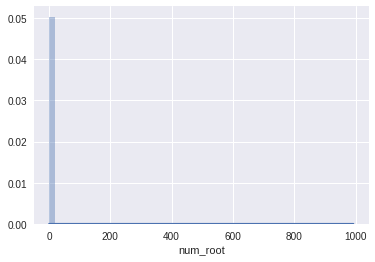

In [30]:
sns.distplot(x_train_cont['num_root'])

In [31]:
x_train_cont['num_root'].value_counts()
x_train_cont.drop(['num_root'],axis=1,inplace=True)
#num_root can be removed too

In [32]:
x_train_cont['root_shell'].value_counts()
#categorical features 

0    493966
1        55
Name: root_shell, dtype: int64

In [33]:
x_train_cont['su_attempted'].value_counts()
# continous feature to be deleted

0    494009
2         6
1         6
Name: su_attempted, dtype: int64

In [ ]:
x_train_cont['num_file_creations'].value_counts()

In [ ]:
x_train_cont['num_shells'].value_counts()

In [34]:
list = ['num_root','num_shells','su_attempted','root_shell','num_file_creations','num_access_files','num_outbound_cmds',
       'srv_count','count','']

In [ ]:
# saving plots as files for more viewing 
hist_plot=[]
for features in list(x_train_cont.columns):
    fig=sns.countplot(x_train_cont[features])
    fig.get_figure().savefig('fig_{}'.format(features))

In [36]:
x_train_cont['su_attempted'].value_counts()

0    494009
2         6
1         6
Name: su_attempted, dtype: int64

In [37]:
x_train_cont['num_shells'].value_counts()

0    493970
1        48
2         3
Name: num_shells, dtype: int64

In [39]:
x_train_cont.describe()

,srv_serror_rate,dst_host_diff_srv_rate,dst_host_srv_rerror_rate,num_shells,num_outbound_cmds,dst_host_srv_serror_rate,srv_diff_host_rate,dst_host_srv_diff_host_rate,same_srv_rate,dst_host_same_srv_rate,...,dst_bytes,dst_host_same_src_port_rate,wrong_fragment,diff_srv_rate,num_failed_logins,root_shell,duration,dst_host_count,num_file_creations,num_compromised
count,494021.000000,494021.000000,494021.000000,494021.000000,494021.0,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,0.176609,0.030906,0.057412,0.000109,0.0,0.176443,0.028996,0.006684,0.791547,0.753782,...,8.685315e+02,0.601935,0.006433,0.020982,0.000152,0.000111,47.979302,232.470790,0.001083,0.010212
std,0.381017,0.109259,0.230140,0.011020,0.0,0.380919,0.142397,0.042133,0.388189,0.410780,...,3.304000e+04,0.481309,0.134805,0.082205,0.015520,0.010551,707.746472,64.745337,0.096416,1.798326
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.410000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,255.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,255.000000,0.000000,0.000000
75%,0.000000,0.040000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,255.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,2.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.155468e+06,1.000000,3.000000,1.000000,5.000000,1.000000,58329.000000,255.000000,28.000000,884.000000


In [40]:
fea_variance.fit(x_train_cont)

VarianceThreshold(threshold=0.0)

In [41]:
fea_variance.variances_

array([  1.45173344e-01,   1.19375294e-02,   5.29644615e-02,
         1.21440379e-04,   0.00000000e+00,   1.45099325e-01,
         2.02768391e-02,   1.77517922e-03,   1.50690777e-01,
         1.68739642e-01,   5.38921119e-02,   4.54317207e+04,
         1.12444884e+04,   6.11683210e-01,   6.06747790e+04,
         1.44945107e-01,   9.76573038e+11,   5.31714131e-02,
         1.33091101e-03,   3.03628810e-05,   5.36493250e-02,
         1.44850813e-01,   6.07248359e-05,   1.09163947e+09,
         2.31657771e-01,   1.81724181e-02,   6.75772938e-03,
         2.40857400e-04,   1.11318905e-04,   5.00904055e+05,
         4.19195022e+03,   9.29600285e-03,   3.23397078e+00])

In [43]:
feature_var_map=[]
for (x,y) in zip(x_train_cont.axes[1].values,fea_variance.variances_):
    feature_var_map.append([x,y])



In [44]:
feature_var_map

[['srv_serror_rate', 0.14517334378180755],
 ['dst_host_diff_srv_rate', 0.011937529438598236],
 ['dst_host_srv_rerror_rate', 0.052964461483812258],
 ['num_shells', 0.00012144037888452375],
 ['num_outbound_cmds', 0.0],
 ['dst_host_srv_serror_rate', 0.14509932525520092],
 ['srv_diff_host_rate', 0.020276839111425481],
 ['dst_host_srv_diff_host_rate', 0.0017751792208406635],
 ['same_srv_rate', 0.15069077747700041],
 ['dst_host_same_srv_rate', 0.16873964244068937],
 ['srv_rerror_rate', 0.053892111873411419],
 ['count', 45431.720679228965],
 ['dst_host_srv_count', 11244.488395111823],
 ['hot', 0.61168321047303098],
 ['srv_count', 60674.779040223359],
 ['serror_rate', 0.14494510744434741],
 ['src_bytes', 976573038456.45569],
 ['dst_host_rerror_rate', 0.05317141313952526],
 ['num_access_files', 0.0013309110117826729],
 ['urgent', 3.0362880958366171e-05],
 ['rerror_rate', 0.053649325009590215],
 ['dst_host_serror_rate', 0.14485081266595995],
 ['su_attempted', 6.0724835902592428e-05],
 ['dst_byte

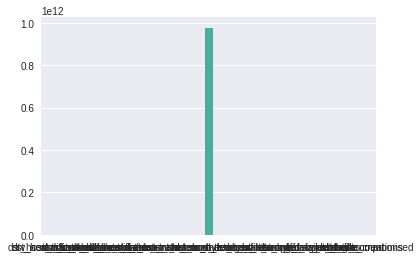

In [45]:
sns.barplot(x=[feature_var_map[i][0] for i in range(len(feature_var_map))],y=[feature_var_map[i][1] for i in range(len(feature_var_map))])

# one feature has abnormally high variance
# time to do something about it

In [ ]:
feature_var_map

In [46]:
x_train_cont['num_outbound_cmds'].value_counts()

#deserve to be deleted 
x_train_cont.drop(['num_outbound_cmds'],axis=1,inplace=True)

In [47]:
x_train_cont['src_bytes'].describe()

count    4.940210e+05
mean     3.025610e+03
std      9.882181e+05
min      0.000000e+00
25%      4.500000e+01
50%      5.200000e+02
75%      1.032000e+03
max      6.933756e+08
Name: src_bytes, dtype: float64

# Feature selection using random forest 

Most important features are selected on the basis of variable importance

In [8]:
import os 
root=os.getcwd()

In [9]:
rf=RandomForestClassifier(max_depth=25, random_state=0)


In [10]:
x_train,y_train,x_test,y_test = fetch_data(root,remove_duplicates=True,binary=True)
x_train = feature_engineering(x_train,do_normalization=True)

Datasets loaded :)
The dimensions of the training dataset is (145583, 41)
The dimensions of test dataset is (311028, 41)
The taken to load data is 3.42 secs


In [11]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [12]:
rf.feature_importances_

array([  4.44830334e-02,   1.67968046e-03,   1.39516021e-02,
         1.70888952e-04,   1.35542028e-04,   1.51164853e-05,
         4.12255142e-05,   2.53849439e-03,   3.46606207e-01,
         6.83704941e-03,   9.83799857e-04,   1.99229941e-03,
         1.63905989e-03,   1.83815295e-03,   8.85624305e-02,
         1.35734780e-01,   8.66776994e-04,   7.34264234e-03,
         5.60677010e-03,   4.62370386e-03,   6.52898597e-02,
         4.58944236e-02,   5.33413987e-03,   8.70891951e-03,
         8.72097791e-03,   6.49136955e-03,   3.11628007e-03,
         2.85739548e-03,   2.29891784e-03,   6.68950624e-04,
         6.59911408e-03,   8.58150226e-02,   4.06640173e-05,
         6.20015883e-02,   2.58178309e-02,   1.24757956e-03,
         2.15408975e-03,   1.29362135e-03])

In [13]:
importances=[]
for (x,y) in zip((x_train.axes[1].values),rf.feature_importances_):
    importances.append([x,y])
    

In [16]:
[i[0] for i in importances]

['dst_bytes',
 'logged_in',
 'num_compromised',
 'root_shell',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'service_ftp_data',
 'service_http',
 'service_other',
 'service_others',
 'service_private',
 'service_smtp',
 'flag_S0',
 'flag_SF',
 'flag_others',
 'protocol_type_tcp',
 'protocol_type_udp']

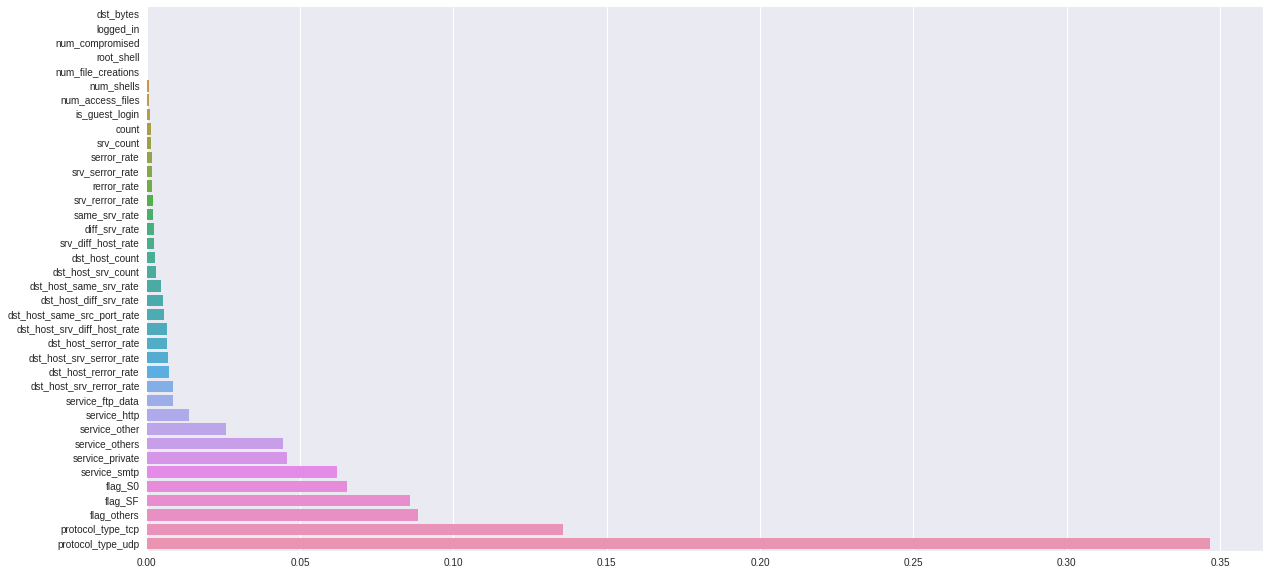

In [19]:
fig, axes = plt.subplots(figsize=(20,10))        
sns.barplot(x=np.sort([i[1] for i in importances]),y=[i[0] for i in importances])